In [1]:
from SimPEG import Mesh, EM, np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append("../../util_codes/")
from View import DataView
from ipywidgets import *

/Applications/Anaconda/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from View import DataView

#  Set-up DataView using EM analytic functions

In [3]:
#EM.Analytics.E_from_ElectricDipoleWholeSpace??

In [4]:
x = np.linspace(-100., 100., 200)
y = np.linspace(-100., 100., 200)
self = DataView()
srcLoc = np.r_[0., 0., 0.] # source location
sig, f = 1e-3, np.r_[1e-7]  # conductivity (S/m), frequency (Hz)
self.set_xyz(x,y, np.r_[0.], normal="Z") # set plane and locations ... 
self.eval_2D(srcLoc, sig, f, "x", EM.Analytics.E_from_ElectricDipoleWholeSpace) # evaluate

In [11]:
sigvec = np.logspace(-5,0,50)
fvec = np.logspace(-10,10,100)
obsLoc=np.c_[1,1,0]
self.eval_loc(srcLoc,obsLoc, sigvec, fvec, "x", EM.Analytics.E_from_ElectricDipoleWholeSpace)

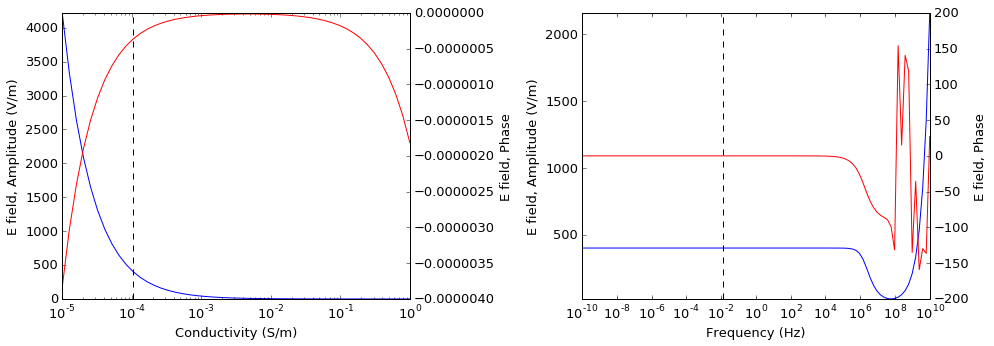

In [14]:
self.plot_1D_y(10,40,mode="AP")

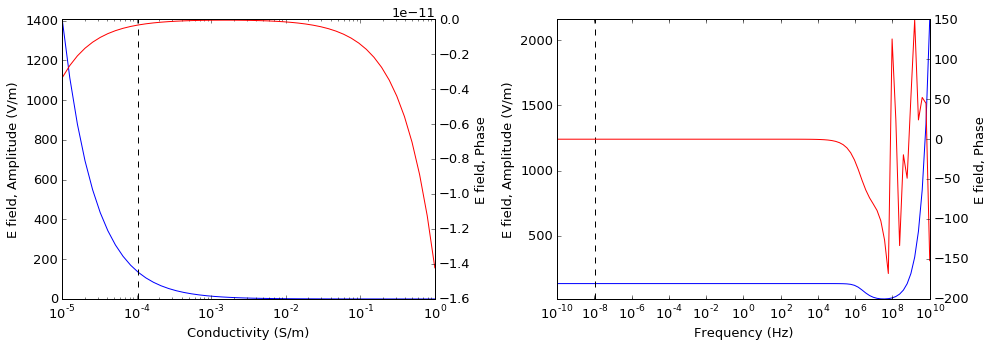

In [16]:
sigind = IntSlider(min=0, max =len(sigvec)-1, step=1,value=10)
freqind = IntSlider(min=0, max =len(fvec)-1, step=1,value=10)
mode = ToggleButtons(options=['RI','AP'],value='RI')
interact(self.plot_1D_x,sigind=sigind,freqind=freqind,mode=mode)